To begin with, I really want to get familiar with the general shape of the figure, so I plot the 128 cities in a graph.


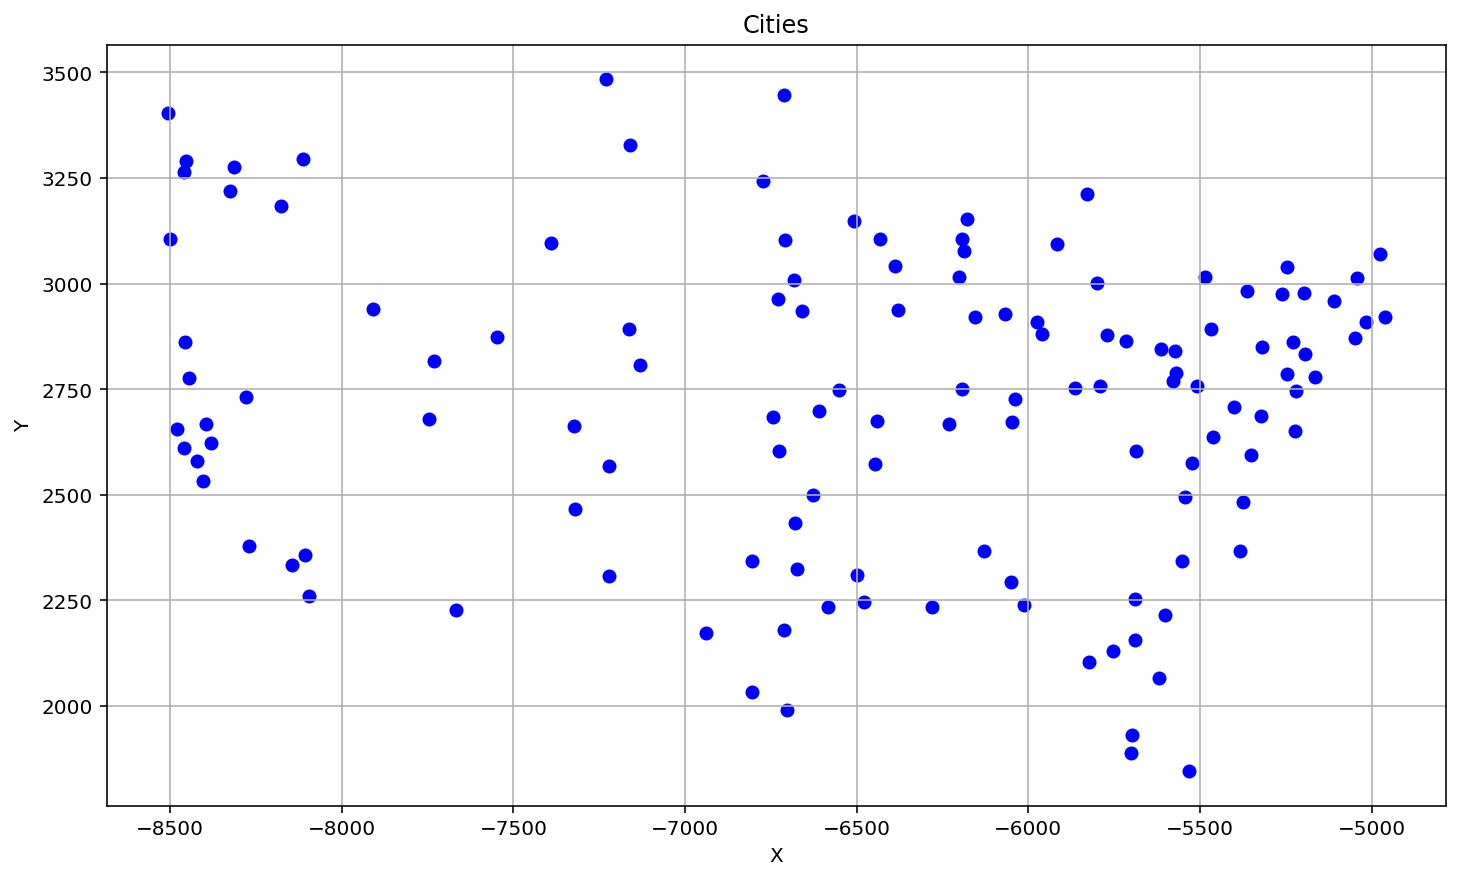

In [3]:
import matplotlib.pyplot as plt

with open("cities2024.txt", "r") as file:
    lines = file.readlines()

coordinates = []
for line in lines:
    parts = line.strip().split()
    if len(parts) == 2:
        x = float(parts[0])
        y = float(parts[1])
        coordinates.append((x, y))

x_coords = [coord[0] for coord in coordinates]
y_coords = [coord[1] for coord in coordinates]

plt.scatter(x_coords, y_coords, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cities')
plt.grid(True)
plt.show()

Then, I would like to try the Cluster First, Route Second algorithm as mentioned in page 307 of the paper. Here, I know I should consider the Objective Function, $K(x_{ijt})=1\sum_{t=1}^3 D_t + 20,000 \sum_{t=1}^3 (C_t-\bar{C})^2.$ And since I would use KMeans in my code, the only thing I want to minimize is $1\sum_{t=1}^3 D_t.$ So I use Greedy Algorithm directly.


In [4]:
import numpy as np
from sklearn.cluster import KMeans

data = np.loadtxt('cities2024.txt')


def distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

x = data[:, 0]
y = data[:, 1]

distance_matrix = []
for i in range(len(x)):
    row = []
    for j in range(len(y)):
        if i == j:
            row.append(0)
        else:
            row.append(distance(x[i], x[j], y[i], y[j]))
    distance_matrix.append(row)

distance_matrix_np = np.array(distance_matrix)

# Cluster the cities into 3 groups using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)

# Then find the best route
def greedy_tsp(indices, distance_matrix):
    n = len(indices)
    start = indices[0]
    tour = [start]
    used = set(tour)
    total_distance = 0

    current = start
    while len(tour) < n:
        next_city = min(((distance_matrix[current, i], i) for i in indices if i not in used), key=lambda x: x[0])
        current = next_city[1]
        tour.append(current)
        used.add(current)
        total_distance += next_city[0]

    # Return to start
    total_distance += distance_matrix[current, start]
    tour.append(start)
    return tour, total_distance

# Calculate the tours and costs
tours = []
costs = []
cluster_sizes = []
for i in range(3):
    cluster_indices = np.where(clusters == i)[0]
    cluster_sizes.append(len(cluster_indices))
    tour, cost = greedy_tsp(cluster_indices, distance_matrix_np)
    tours.append(tour)
    costs.append(cost)

# Calculate the objective function
C = len(data)  # Just 128
c_mean = C / 3  
objective = sum(costs) + 20000 * sum((c_t - c_mean) ** 2 for c_t in cluster_sizes)

# Print the results
for i, (tour, cost) in enumerate(zip(tours, costs)):
    print(f"Group {i+1} Tour: {tour}")
    print(f"Group {i+1} Cost: {cost}")

print(f"Objective Function Value: {objective}")



Group 1 Tour: [0, 127, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 30, 51, 69, 105, 21, 46, 109, 49, 91, 64, 120, 12, 118, 5, 63, 97, 9, 126, 58, 79, 11, 55, 36, 23, 116, 47, 27, 45, 25, 66, 3, 111, 106, 81, 83, 0]
Group 1 Cost: 8204.30201961073
Group 2 Tour: [2, 17, 78, 54, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 121, 96, 114, 39, 28, 68, 123, 2]
Group 2 Cost: 5107.272209329083
Group 3 Tour: [1, 70, 71, 22, 34, 6, 107, 102, 117, 24, 4, 60, 20, 122, 115, 67, 103, 77, 65, 42, 75, 73, 38, 72, 50, 32, 41, 104, 48, 99, 14, 13, 29, 94, 31, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 1]
Group 3 Cost: 8129.587069577432
Objective Function Value: 9794774.494631851


Here, I found the optimal route. Also, I plot the graphs classified according to my ideas.

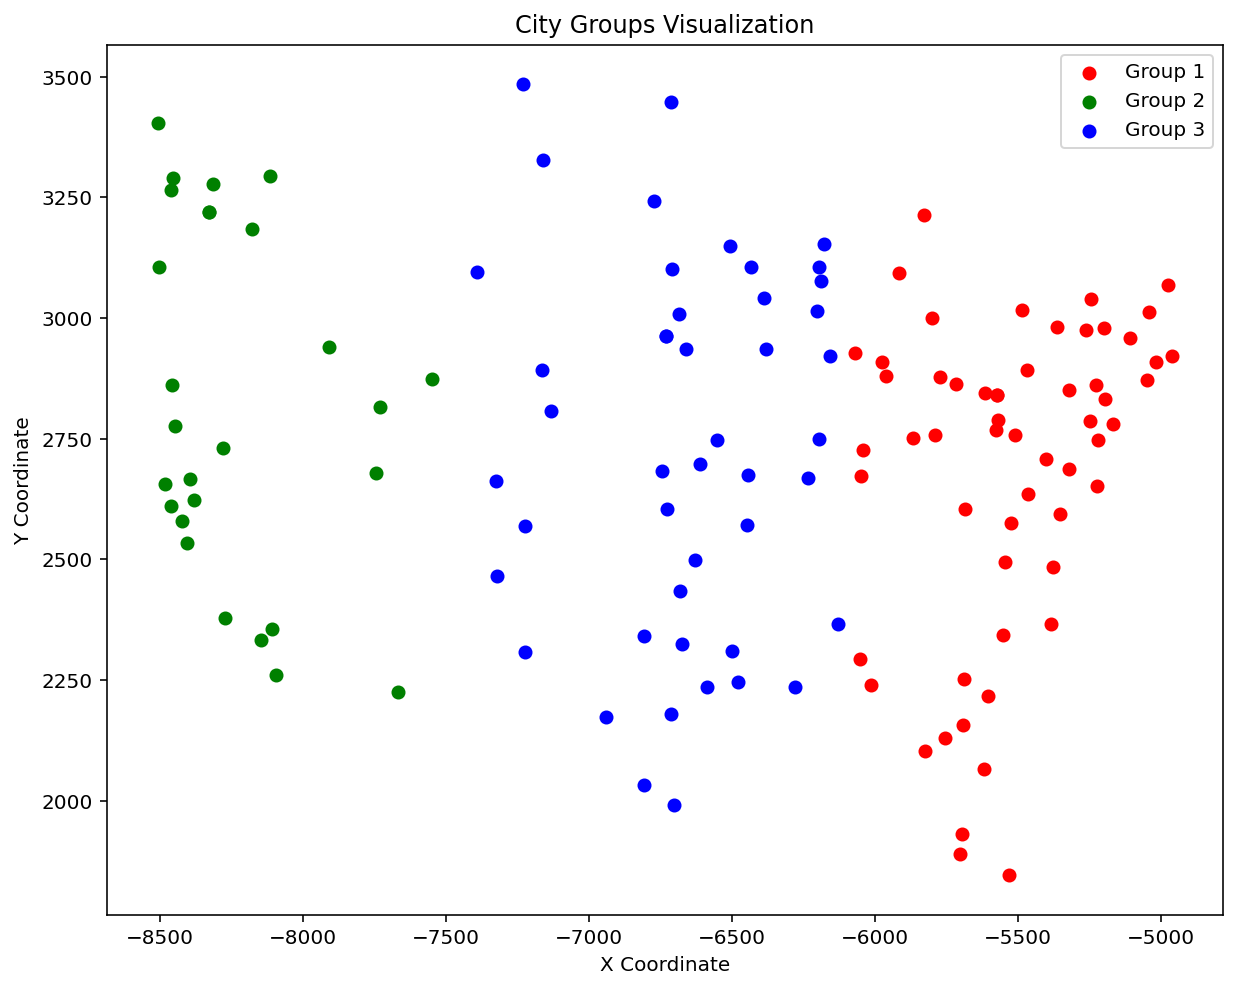

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
   [0, 127, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 30, 51, 69, 105, 21, 46, 109, 49, 91, 64, 120, 12, 118, 5, 63, 97, 9, 126, 58, 79, 11, 55, 36, 23, 116, 47, 27, 45, 25, 66, 3, 111, 106, 81, 83, 0],
   [2, 17, 78, 54, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 121, 96, 114, 39, 28, 68, 123, 2],
   [1, 70, 71, 22, 34, 6, 107, 102, 117, 24, 4, 60, 20, 122, 115, 67, 103, 77, 65, 42, 75, 73, 38, 72, 50, 32, 41, 104, 48, 99, 14, 13, 29, 94, 31, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 1]   
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')

plt.title('City Groups Visualization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

I also plot the Directed Graph:

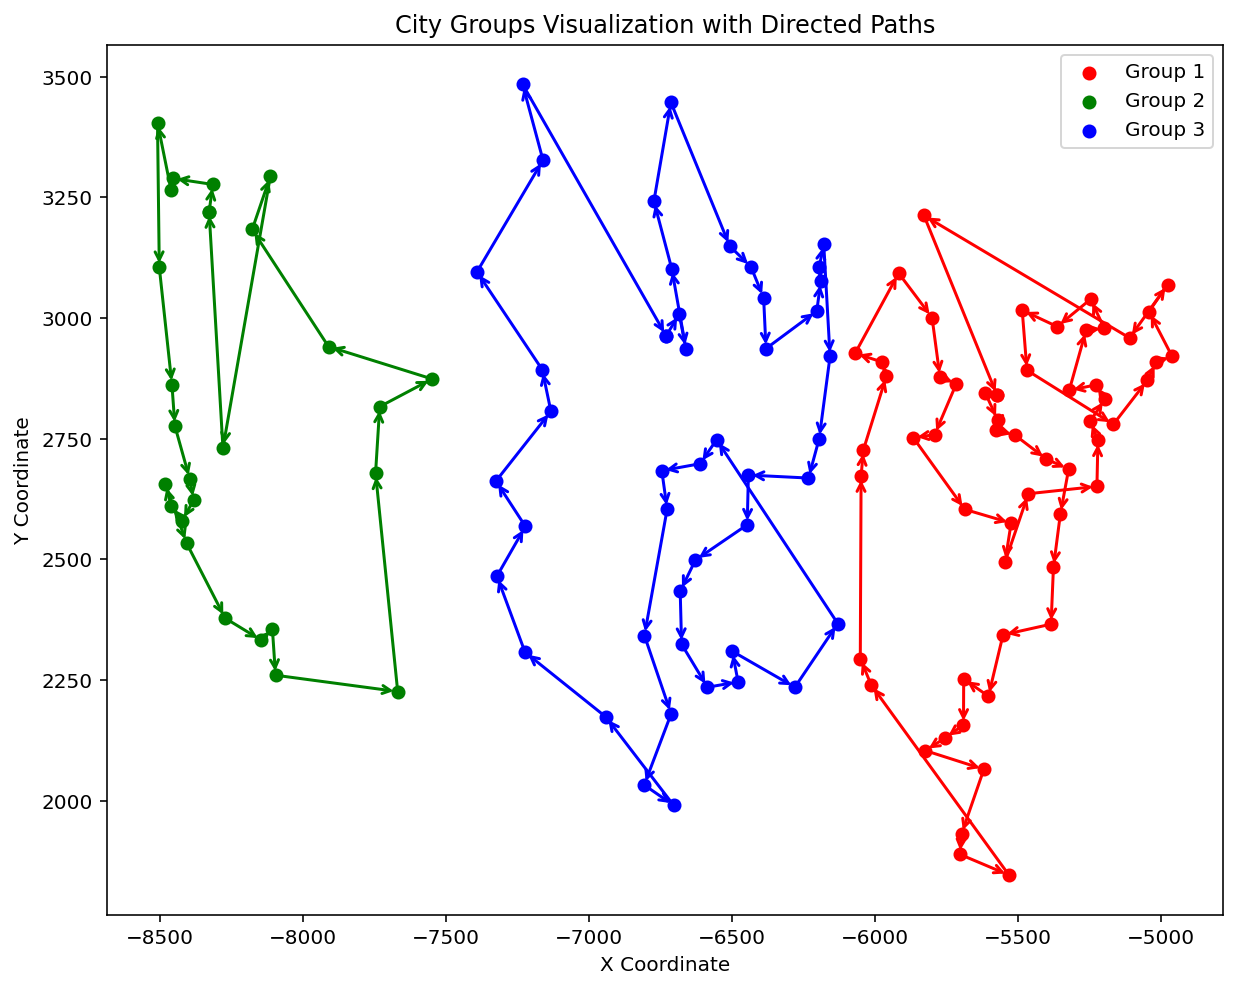

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
    [0, 127, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 30, 51, 69, 105, 21, 46, 109, 49, 91, 64, 120, 12, 118, 5, 63, 97, 9, 126, 58, 79, 11, 55, 36, 23, 116, 47, 27, 45, 25, 66, 3, 111, 106, 81, 83, 0],
    [2, 17, 78, 54, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 121, 96, 114, 39, 28, 68, 123, 2],
    [1, 70, 71, 22, 34, 6, 107, 102, 117, 24, 4, 60, 20, 122, 115, 67, 103, 77, 65, 42, 75, 73, 38, 72, 50, 32, 41, 104, 48, 99, 14, 13, 29, 94, 31, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 1]
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')
    # Arrows~
    for j in range(len(group) - 1):
        start_x, start_y = x[group[j]], y[group[j]]
        end_x, end_y = x[group[j+1]], y[group[j+1]]
        plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                     arrowprops=dict(arrowstyle="->", color=colors[i], lw=1.5))

plt.title('City Groups Visualization with Directed Paths')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

Finally, we mark the beginning point in order to trace the path.

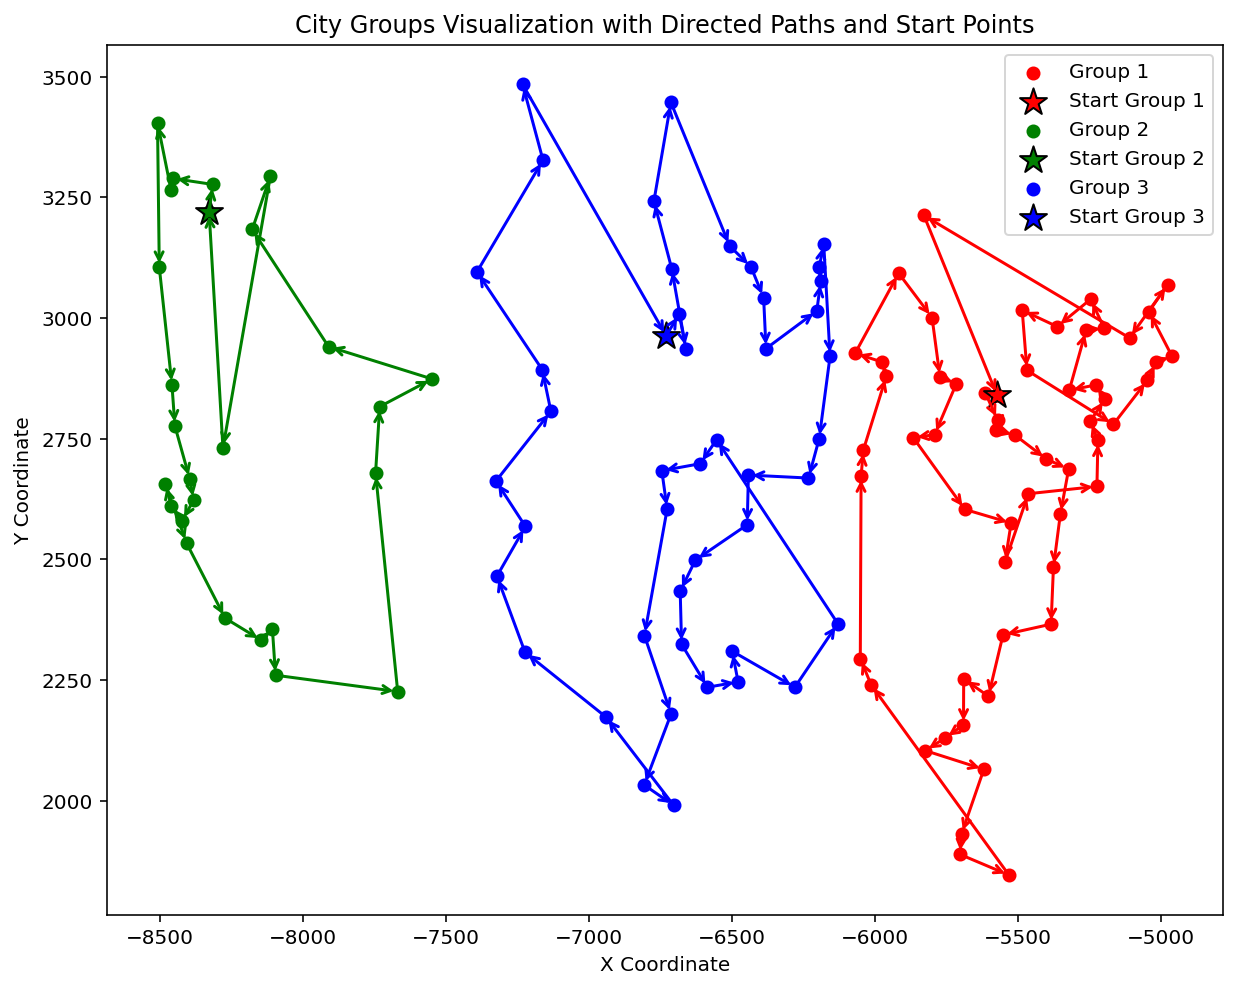

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
    [0, 127, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 30, 51, 69, 105, 21, 46, 109, 49, 91, 64, 120, 12, 118, 5, 63, 97, 9, 126, 58, 79, 11, 55, 36, 23, 116, 47, 27, 45, 25, 66, 3, 111, 106, 81, 83, 0],
    [2, 17, 78, 54, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 121, 96, 114, 39, 28, 68, 123, 2],
    [1, 70, 71, 22, 34, 6, 107, 102, 117, 24, 4, 60, 20, 122, 115, 67, 103, 77, 65, 42, 75, 73, 38, 72, 50, 32, 41, 104, 48, 99, 14, 13, 29, 94, 31, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 1]
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')
    
    # Start point
    start_x, start_y = x[group[0]], y[group[0]]
    plt.scatter(start_x, start_y, c=colors[i], s=200, marker='*', edgecolors='k', label=f'Start Group {i+1}')
    
    for j in range(len(group) - 1):
        start_x, start_y = x[group[j]], y[group[j]]
        end_x, end_y = x[group[j+1]], y[group[j+1]]
        plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                     arrowprops=dict(arrowstyle="->", color=colors[i], lw=1.5))

plt.title('City Groups Visualization with Directed Paths and Start Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

But above is not my final answer. I try to use Gurobi to solve this problems as well. But unfortunately, my Cocal doesn't seem to like Gurobi(I can not import anything about Gurobi) but my Vscode does. So I include the code as well as the .py files.

In [0]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
from sklearn.cluster import KMeans

data = np.loadtxt('cities2024.txt')  # Correct path for your environment

def distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

x = data[:, 0]
y = data[:, 1]

distance_matrix = []
for i in range(len(x)):
    row = []
    for j in range(len(y)):
        if i == j:
            row.append(0)  
        else:
            row.append(distance(x[i], x[j], y[i], y[j]))
    distance_matrix.append(row)

distance_matrix_np = np.array(distance_matrix)

# Cluster the cities into 3 groups using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)

# Function to solve TSP for a given cluster
def solve_tsp_for_cluster(cluster_indices, distance_matrix):
    model = gp.Model(f"TSP_cluster_{cluster_indices[0]}")
    n = len(cluster_indices)
    x = model.addVars(n, n, vtype=GRB.BINARY, name="x")

    # Objective: Minimize travel distance
    model.setObjective(gp.quicksum(x[i, j] * distance_matrix[cluster_indices[i], cluster_indices[j]]
                                   for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    # Constraints: Enter and exit each city exactly once
    for i in range(n):
        model.addConstr(sum(x[i, j] for j in range(n) if j != i) == 1)
        model.addConstr(sum(x[j, i] for j in range(n) if j != i) == 1)

    # Subtour elimination constraints
    u = model.addVars(n, vtype=GRB.INTEGER)
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                model.addConstr(u[i] - u[j] + n * x[i, j] <= n - 1)

    model.Params.lazyConstraints = 1
    model.optimize()

    tour = []
    if model.status == GRB.OPTIMAL:
        solution = model.getAttr('X', x)
        for i in range(n):
            for j in range(n):
                if i != j and solution[i, j] > 0.5:
                    tour.append((cluster_indices[i], cluster_indices[j]))

        tour_cost = model.objVal
        return tour, tour_cost
    else:
        return [], None

total_cost = 0
cluster_sizes = []
for t in range(3):
    cluster_indices = np.where(clusters == t)[0]
    cluster_sizes.append(len(cluster_indices))
    tour, tour_cost = solve_tsp_for_cluster(cluster_indices, distance_matrix_np)
    if tour:
        print(f"Tour for cluster {t+1}: {tour}")
        print(f"Cost for cluster {t+1}: {tour_cost}")
        total_cost += tour_cost

# Calculate the mean cluster size and penalty term
c_mean = np.mean(cluster_sizes)
penalty = 20000 * sum((c_t - c_mean) ** 2 for c_t in cluster_sizes)

K = total_cost + penalty

print(f"Total cost: {total_cost}")
print(f"Penalty: {penalty}")
print(f"Objective Function Value K: {K}")


And I can report my output as follows:

Tour for cluster 1: [(0, 27), (3, 66), (5, 118), (7, 37), (8, 57), (9, 97), (11, 126), (12, 5), (15, 61), (16, 84), (19, 108), (21, 46), (23, 36), (25, 45), (26, 119), (27, 47), (30, 51), (35, 53), (36, 81), (37, 15), (40, 30), (45, 58), (46, 83), (47, 116), (49, 91), (51, 69), (52, 35), (53, 76), (55, 23), (56, 19), (57, 82), (58, 79), (61, 127), (63, 7), (64, 120), (66, 25), (69, 105), (76, 40), (79, 11), (81, 111), (82, 56), (83, 109), (84, 52), (91, 64), (97, 26), (105, 21), (106, 3), (108, 16), (109, 49), (111, 106), (113, 8), (116, 55), (118, 63), (119, 113), (120, 12), (126, 9), (127, 0)]

Cost for cluster 1: 6507.287760143476

Tour for cluster 2: [(2, 17), (17, 33), (18, 125), (28, 2), (33, 78), (39, 68), (43, 121), (54, 101), (59, 110), (68, 28), (78, 54), (85, 90), (87, 88), (88, 93), (89, 98), (90, 89), (92, 43), (93, 92), (96, 39), (98, 87), (101, 18), (110, 85), (114, 96), (121, 114), (123, 59), (125, 123)]

Cost for cluster 2: 4290.232913486374

Tour for cluster 3: [(1, 71), (4, 115), (6, 34), (10, 124), (13, 73), (14, 42), (20, 60), (22, 70), (24, 122), (29, 31), (31, 94), (32, 72), (34, 22), (38, 29), (41, 32), (42, 75), (44, 100), (48, 99), (50, 65), (60, 4), (62, 80), (65, 77), (67, 103), (70, 1), (71, 107), (72, 50), (73, 38), (74, 10), (75, 13), (77, 104), (80, 74), (86, 44), (94, 95), (95, 112), (99, 14), (100, 62), (102, 117), (103, 41), (104, 48), (107, 102), (112, 86), (115, 67), (117, 24), (122, 20), (124, 6)]

Cost for cluster 3: 7232.595905624272

Total cost: 18030.11657925412

Penalty: 9773333.333333334

Objective Function Value K: 9791363.449912587

Next, let's express them as paths:

Cluster 1:
[0, 127, 61, 15, 37, 7, 63, 118, 5, 12, 120, 64, 91, 49, 109, 83, 46, 21, 105, 69, 51, 30, 40, 76, 53, 35, 52, 84, 16, 108, 19, 56, 82, 57, 8, 113, 119, 26, 97, 9, 126, 11, 79, 58, 45, 25, 66, 3, 106, 111, 81, 36, 23, 55, 116, 47, 27, 0],

Cluster 2:
[2, 17, 33, 78, 54, 101, 18, 125, 123, 59, 110, 85, 90, 89, 98, 87, 88, 93, 92, 43, 121, 114, 96, 39, 68, 28, 2],

Cluster 3:
[1, 71, 107, 102, 117, 24, 122, 20, 60, 4, 115, 67, 103, 41, 32, 72, 50, 65, 77, 104, 48, 99, 14, 42, 75, 13, 73, 38, 29, 31, 94, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 6, 34, 22, 70, 1]

Also, we plot the graphs:

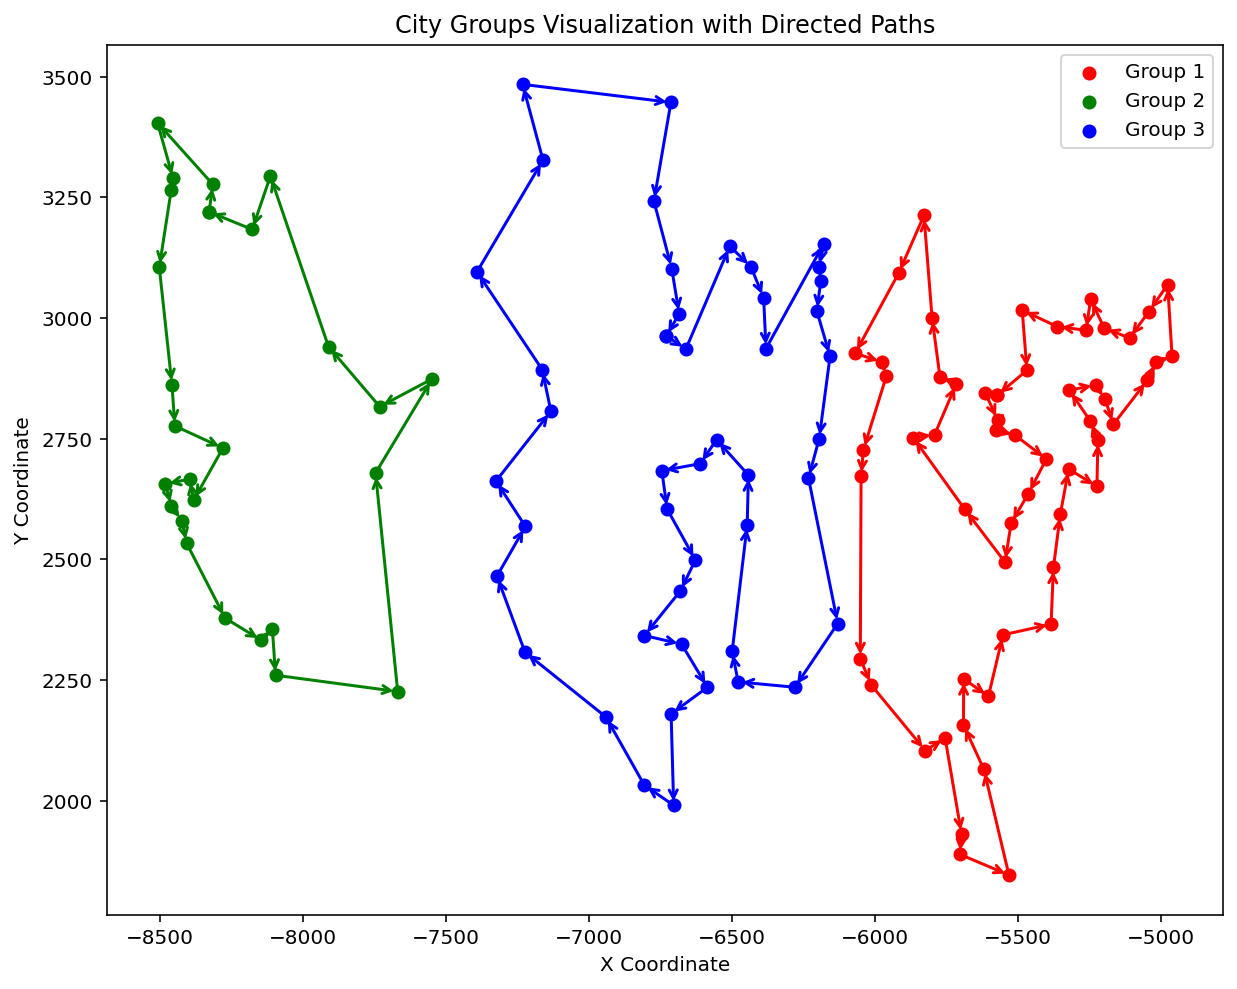

In [3]:
#GB method

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
    [0, 127, 61, 15, 37, 7, 63, 118, 5, 12, 120, 64, 91, 49, 109, 83, 46, 21, 105, 69, 51, 30, 40, 76, 53, 35, 52, 84, 16, 108, 19, 56, 82, 57, 8, 113, 119, 26, 97, 9, 126, 11, 79, 58, 45, 25, 66, 3, 106, 111, 81, 36, 23, 55, 116, 47, 27, 0],
    [2, 17, 33, 78, 54, 101, 18, 125, 123, 59, 110, 85, 90, 89, 98, 87, 88, 93, 92, 43, 121, 114, 96, 39, 68, 28, 2],
    [1, 71, 107, 102, 117, 24, 122, 20, 60, 4, 115, 67, 103, 41, 32, 72, 50, 65, 77, 104, 48, 99, 14, 42, 75, 13, 73, 38, 29, 31, 94, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 6, 34, 22, 70, 1]
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')
    
    for j in range(len(group) - 1):
        start_x, start_y = x[group[j]], y[group[j]]
        end_x, end_y = x[group[j+1]], y[group[j+1]]
        plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                     arrowprops=dict(arrowstyle="->", color=colors[i], lw=1.5))

plt.title('City Groups Visualization with Directed Paths')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

It looks better:)

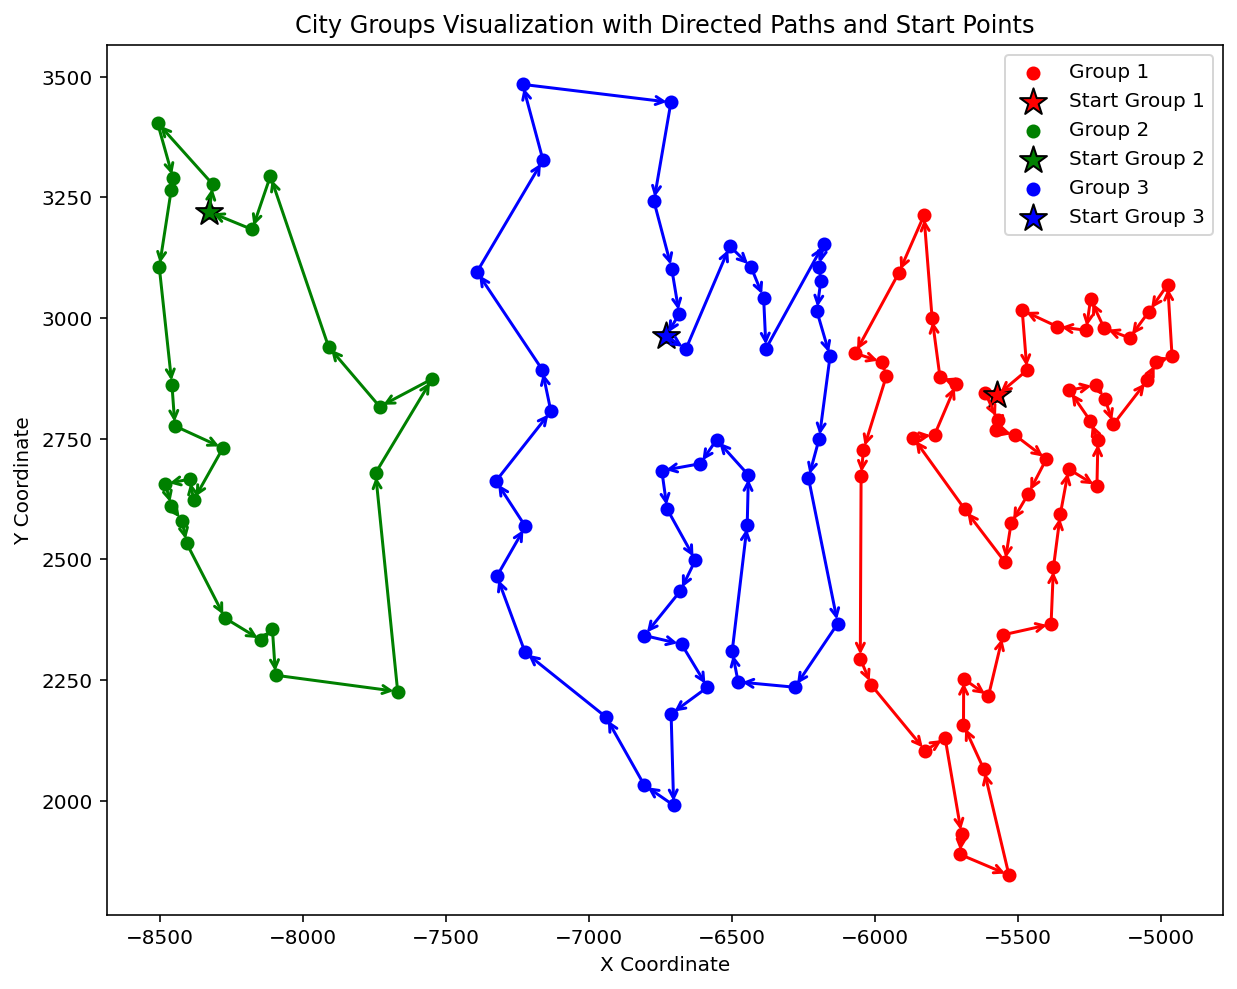

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
    [0, 127, 61, 15, 37, 7, 63, 118, 5, 12, 120, 64, 91, 49, 109, 83, 46, 21, 105, 69, 51, 30, 40, 76, 53, 35, 52, 84, 16, 108, 19, 56, 82, 57, 8, 113, 119, 26, 97, 9, 126, 11, 79, 58, 45, 25, 66, 3, 106, 111, 81, 36, 23, 55, 116, 47, 27, 0],
    [2, 17, 33, 78, 54, 101, 18, 125, 123, 59, 110, 85, 90, 89, 98, 87, 88, 93, 92, 43, 121, 114, 96, 39, 68, 28, 2],
    [1, 71, 107, 102, 117, 24, 122, 20, 60, 4, 115, 67, 103, 41, 32, 72, 50, 65, 77, 104, 48, 99, 14, 42, 75, 13, 73, 38, 29, 31, 94, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 6, 34, 22, 70, 1]
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')
    
    # Start point
    start_x, start_y = x[group[0]], y[group[0]]
    plt.scatter(start_x, start_y, c=colors[i], s=200, marker='*', edgecolors='k', label=f'Start Group {i+1}')
    
    for j in range(len(group) - 1):
        start_x, start_y = x[group[j]], y[group[j]]
        end_x, end_y = x[group[j+1]], y[group[j+1]]
        plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                     arrowprops=dict(arrowstyle="->", color=colors[i], lw=1.5))

plt.title('City Groups Visualization with Directed Paths and Start Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

Compared to the previous picture, the GB method is more effective!

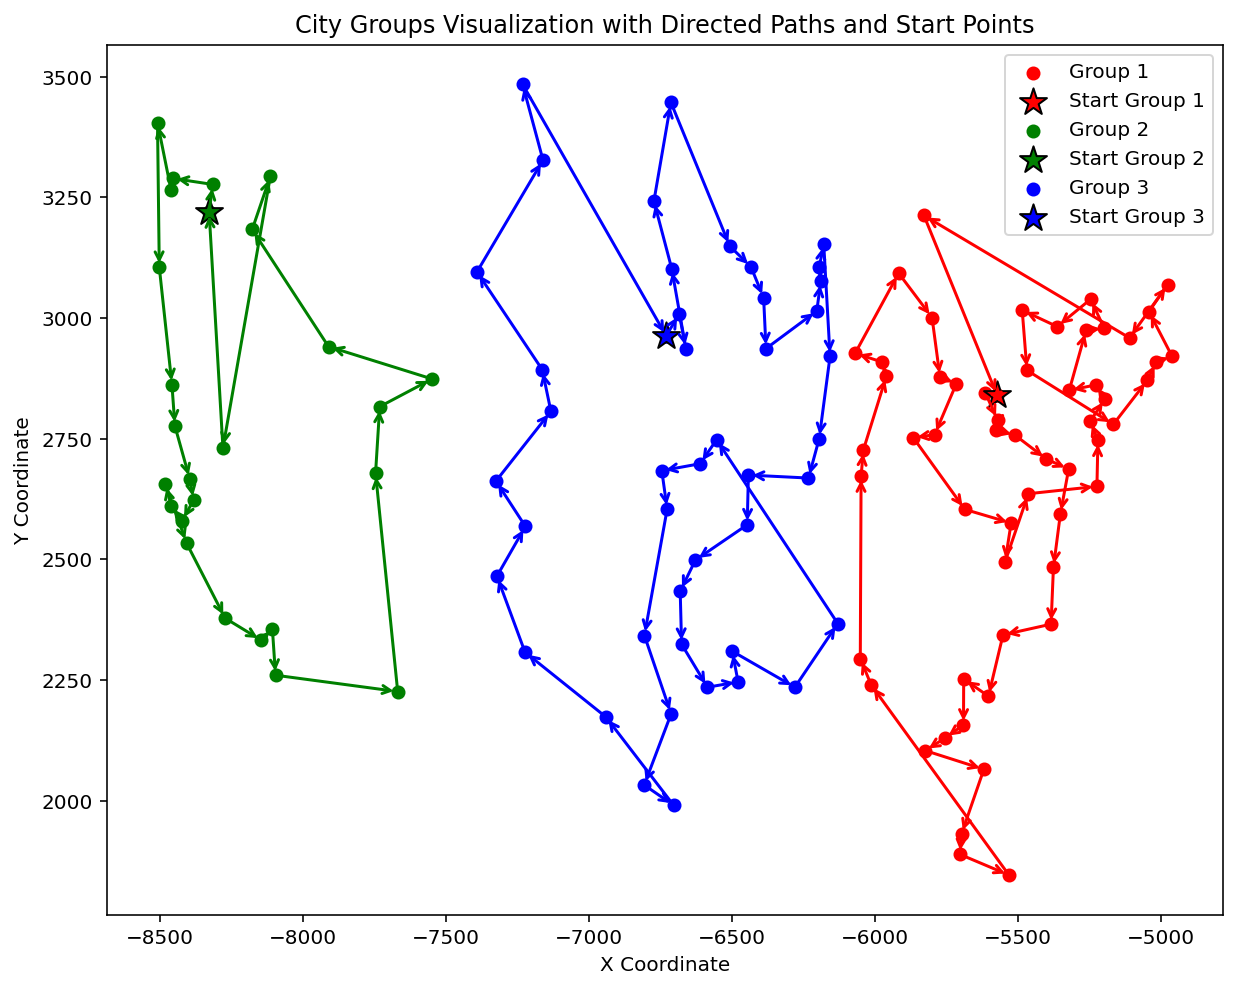

In [5]:
# Last Graph
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('cities2024.txt')

x = data[:, 0]
y = data[:, 1]

groups = [
    [0, 127, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 30, 51, 69, 105, 21, 46, 109, 49, 91, 64, 120, 12, 118, 5, 63, 97, 9, 126, 58, 79, 11, 55, 36, 23, 116, 47, 27, 45, 25, 66, 3, 111, 106, 81, 83, 0],
    [2, 17, 78, 54, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 121, 96, 114, 39, 28, 68, 123, 2],
    [1, 70, 71, 22, 34, 6, 107, 102, 117, 24, 4, 60, 20, 122, 115, 67, 103, 77, 65, 42, 75, 73, 38, 72, 50, 32, 41, 104, 48, 99, 14, 13, 29, 94, 31, 95, 112, 86, 44, 100, 62, 80, 74, 10, 124, 1]
]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for i, group in enumerate(groups):
    plt.scatter(x[group], y[group], c=colors[i], label=f'Group {i+1}')
    
    # Start point
    start_x, start_y = x[group[0]], y[group[0]]
    plt.scatter(start_x, start_y, c=colors[i], s=200, marker='*', edgecolors='k', label=f'Start Group {i+1}')
    
    for j in range(len(group) - 1):
        start_x, start_y = x[group[j]], y[group[j]]
        end_x, end_y = x[group[j+1]], y[group[j+1]]
        plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                     arrowprops=dict(arrowstyle="->", color=colors[i], lw=1.5))

plt.title('City Groups Visualization with Directed Paths and Start Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.show()

Hence Done! 